Beta: [ 0.08232286 -0.06633047]
Beta Std Error: [0.08815476 0.16375733]
Beta Covariance: [[ 0.0094325  -0.01733793]
 [-0.01733793  0.03254894]]
Residual Variance: 0.8238811989777648
Inverse Condition #: 0.05320688895127845
Reason(s) for Halting:
  Sum of squares convergence


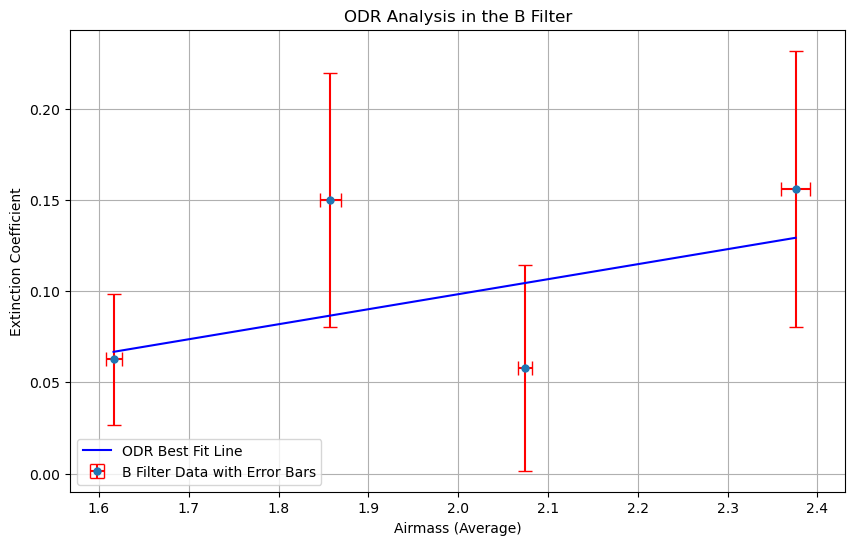

In [1]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Replace this with the path to your B filter CSV file
file_path = "/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/GD 421/bFilterCoeff.csv"

# Load CSV data with the correct delimiter
df_b = pd.read_csv(file_path, delimiter='\t')


# Preparing ODR data
x = df_b['Airmass (Average)']
y = df_b['Extinction Coefficient']
x_err = df_b['Airmass Error']
y_err = df_b['Error']

# Define the linear model function
def linear_func(p, x):
    m, c = p
    return m * x + c

# Initialize model
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Estimate initial slope using numpy polyfit
initial_slope = np.polyfit(x, y, 1)[0]
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the ODR
out = odr.run()
out.pprint()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='B Filter Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('Airmass (Average)')
plt.ylabel('Extinction Coefficient')
plt.title('ODR Analysis in the B Filter')
plt.legend()
plt.grid(True)
plt.show()

